![Astrofisica Computacional](../logo.PNG)

---
## 03. Spectral Methods. 1D  Non-Linear Viscous Advection Equation 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we use some spectral methods to solve the 1-dimensional non-linear advection equation with viscosity.


---

## An Incompressible Viscous Fluid 


Consider the equation of motion for a viscous fluid

\begin{equation}
\rho \left( \frac{\partial \vec{v}}{\partial t} + \vec{v} \cdot \vec{\nabla} \vec{v}\right) = - \vec{\nabla } P + \vec{\nabla} \cdot \boldsymbol{\sigma}
\end{equation}

where the viscous stress tensor is [see L. D. Landau and E. M. Lifschitz, Fluid Mechanics (1959)]

\begin{equation}
\sigma_{ij} = \eta \left( \partial _i v_j + \partial _j v_i - \frac{2}{3} \partial_k v_k \delta_{ij} \right).
\end{equation}

Assuming a constant kinematic coefficient of viscosity, $\eta$, the equation of motion is written in components as

\begin{equation}
\rho \left( \frac{\partial v_i}{\partial t} + \vec{v} \cdot \vec{\nabla} v_i \right) = - \partial_i P + \eta \left( \partial_j \partial_j v_i - \frac{1}{3} \partial_i \partial_k v_k \right)
\end{equation}

An incompressible fluid is characterized by $\vec{\nabla} \cdot \vec{v} = 0$ and therefore, its equation of motion simplifies to

\begin{equation}
\rho \left( \frac{\partial v_i}{\partial t} + \vec{v} \cdot \vec{\nabla} v_i \right) = - \partial_i P + \eta \partial_j \partial_j v_i
\end{equation}

\begin{equation}
\frac{\partial v_i}{\partial t} + \vec{v} \cdot \vec{\nabla} v_i = - \frac{1}{\rho} \partial_i P + \frac{\eta}{\rho} \partial_j \partial_j v_i.
\end{equation}

Introducing the dynamic coefficient of viscosity, $\nu = \frac{\eta}{\rho}$, we obtain

\begin{equation}
\frac{\partial v_i}{\partial t} + v_j \frac{\partial v_i}{\partial x_j} = - \frac{1}{\rho} \frac{\partial P}{\partial x_i} + \nu \frac{\partial^2 v_i}{\partial x_j^2}.
\end{equation}

For constant pressure, the equation of motion becomes a viscous Burger's equation, 

\begin{equation}
\frac{\partial v_i}{\partial t} + v_j \frac{\partial v_i}{\partial x_j} =  \nu \frac{\partial^2 v_i}{\partial x_j^2}.
\end{equation}


---
## The Non-Linear 1D Advection Equation with a viscosity term (viscous Burger's equation) and the Spectral Methods

We will solve the 1-dimensional non-linear advection equation, known as Burguer's equation, with a viscosity term. It reads

\begin{equation}
\frac{\partial \psi}{\partial t} + \psi \frac{\partial \psi}{\partial x} = \nu \frac{\partial ^2 \psi}{\partial x^2}.
\end{equation}


The pseudo-spectral  method will solve the problem in the physical space but evaluates the spatial derivative in the spectral space. This idea is implemented by considering the spectral decomposition of the function $\psi$,

\begin{equation}
\psi (t,x)= \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t)e^{\frac{2\pi i k x}{L}},
\end{equation} 

which gives teh derivatives

\begin{equation}
\frac{\partial \psi (t,x)}{\partial x} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}}. 
\end{equation}

and 

\begin{equation}
\frac{\partial^2 \psi (t,x)}{\partial x^2} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \left(\frac{2\pi i k}{L}\right)^2  e^{\frac{2\pi i k x}{L}}. 
\end{equation}

Then, the viscous Burger's equation becomes

\begin{equation}
\partial_t \psi = - \psi \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}} + \nu \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \left(\frac{2\pi i k}{L}\right)^2  e^{\frac{2\pi i k x}{L}}
\end{equation}

and we evaluate it at the grid points $x_j$ to obtain

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}} + \nu \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \left(\frac{2\pi i k}{L}\right)^2  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Writing the coeffcients as a DFT, i.e. $a_k (t) = F_k \left[\psi (t) \right]$, we obtain 

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} F_k \left[\psi (t) \right] \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}} + \nu \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} F_k \left[\psi (t) \right] \left(\frac{2\pi i k}{L}\right)^2  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Re-organizing terms, we note that the right hand side of this equation contains some iDFT,

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \left(  \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right)  e^{\frac{2\pi i k j}{N}} + \nu \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \left( \left(\frac{2\pi i k}{L}\right)^2 F_k \left[\psi (t) \right]  \right) e^{\frac{2\pi i k j}{N}}.
\end{equation}

which can be written as, 

\begin{equation}
\partial_t \psi_j = - \psi_j F_j^{-1} \left[ \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right] + \nu F_j^{-1} \left[ \left(\frac{2\pi i k}{L}\right)^2 F_k \left[\psi (t) \right] \right].
\end{equation}




---

### Implementation of the Solution

We will use, as an example, an initial sinusoidal profile and the integration will be done using the `odeint` function.

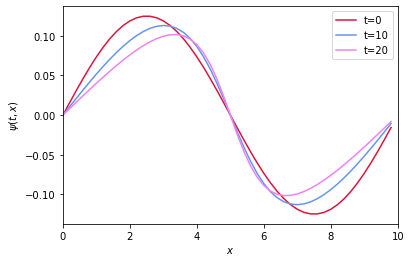

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.integrate import odeint


# Definition of the initial Sin profile
def sinProfile(x):
    return (1/8.)*np.sin(2*np.pi*x/L)

def ODE(u, t):
    N = len(u)
    k = np.arange(N)
    k[int(N/2)+1:]-= N
    T1 = -u*ifft(2*np.pi*1j*k/L*fft(u)).real
    T2 = nu*ifft((2*np.pi*1j*k/L)**2*fft(u)).real
    return T1 + T2


# spatial grid definition
xi = 0.
xf = 10.
L   = xf - xi
nx  = 50 # number of spatial nodes

dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 

psi0 = sinProfile(x)

nu = 0.05 # Viscosity coefficient

#---------- solve the problem and plot
t = np.linspace(0,50,100)
psi = odeint(ODE, psi0, t)

fig,ax=plt.subplots()


ax.plot(x, psi[0,:], color='crimson', label='t=0')
ax.plot(x, psi[10,:], color='cornflowerblue', label='t=10')
ax.plot(x, psi[20,:], color='violet', label='t=20')
    
plt.xlim([0,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

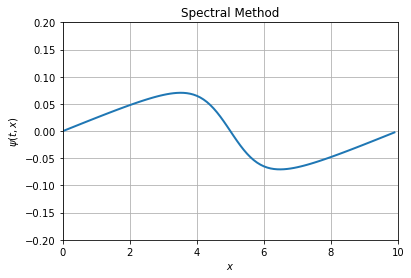

In [11]:
from matplotlib import animation
from IPython.display import HTML

nx  = 100
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 
psi0 = sinProfile(x)

nu = 0.05

t = np.linspace(0,50,100)
psi = odeint(ODE, psi0, t)


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('Spectral Method')
ax.set_xlim(( 0, 10))
ax.set_ylim((-0.2, .2))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')
plt.grid()

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    xp = x
    yp = psi[i,:] 
    line.set_data(xp, yp)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50,
                               interval=20, # only 10 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())
